In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
data = pd.read_csv("car_price_dataset.csv")

In [4]:
data.head(2)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092


In [5]:
print("The info...about data = ", data.info())
print("*"*50)
print("The shape of data = ", data.shape)
print("*"*50)
print("The statistical information = ", data.describe())
print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
The info...about data =  None
**************************************************
The shape of data =  (10000, 10)
**************************************************
The statistical information =                 Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   

In [6]:
print("The null value count = ", data.isnull().sum())
print("*"*50)
print("Duplicated values = ",data.duplicated().sum())

The null value count =  Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
**************************************************
Duplicated values =  0


In [7]:
# dividing the data into numerical and categorical variables

categorical = data.select_dtypes(include = ["object"])
print("The categorical columns are = ",categorical)
print("*"*50)
numerical = data.select_dtypes(include = ["int64","float64"])
print("The numerical columns are = ",numerical)


The categorical columns are =             Brand     Model Fuel_Type    Transmission
0            Kia       Rio    Diesel          Manual
1      Chevrolet    Malibu    Hybrid       Automatic
2       Mercedes       GLA    Diesel       Automatic
3           Audi        Q5  Electric          Manual
4     Volkswagen      Golf    Hybrid  Semi-Automatic
...          ...       ...       ...             ...
9995         Kia    Optima    Diesel  Semi-Automatic
9996   Chevrolet    Impala  Electric       Automatic
9997         BMW  3 Series    Petrol       Automatic
9998        Ford  Explorer    Hybrid       Automatic
9999  Volkswagen    Tiguan    Diesel          Manual

[10000 rows x 4 columns]
**************************************************
The numerical columns are =        Year  Engine_Size  Mileage  Doors  Owner_Count  Price
0     2020          4.2   289944      3            5   8501
1     2012          2.0     5356      2            3  12092
2     2020          4.2   231440      4        

# checking outliers

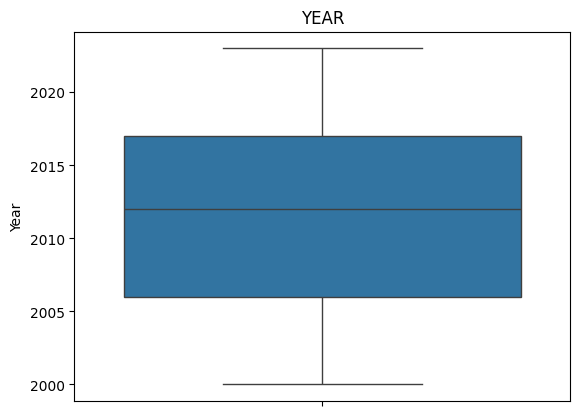

In [8]:
# year 
plt.title("YEAR")
sns.boxplot(numerical["Year"])
plt.show()

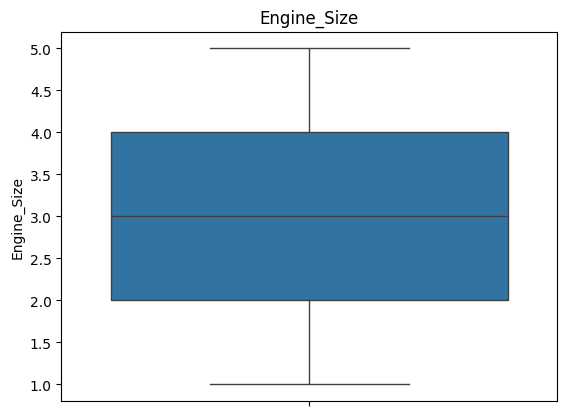

In [9]:
# Engine_Size
plt.title("Engine_Size")
sns.boxplot(numerical["Engine_Size"])
plt.show()

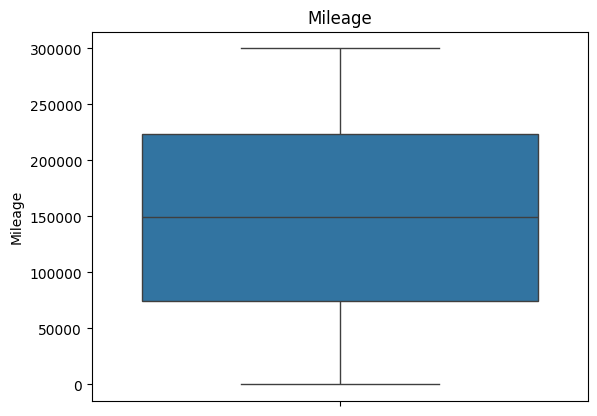

In [10]:
# Mileage
plt.title("Mileage")
sns.boxplot(numerical["Mileage"])
plt.show()

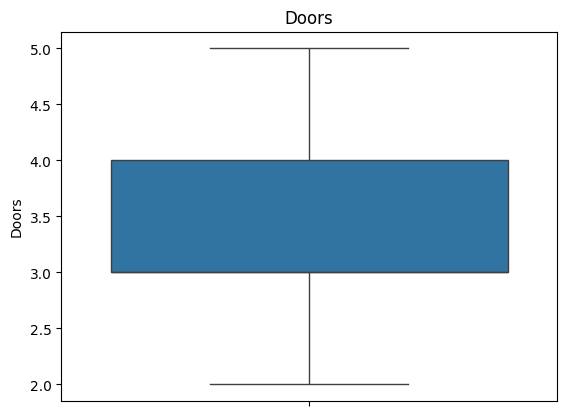

In [11]:
# Doors
plt.title("Doors")
sns.boxplot(numerical["Doors"])
plt.show()

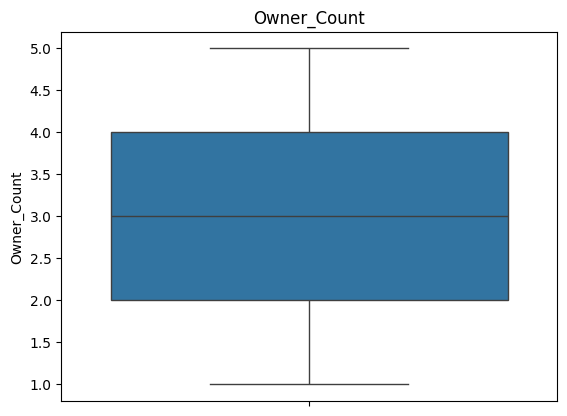

In [12]:
# Owner_Count
plt.title("Owner_Count")
sns.boxplot(numerical["Owner_Count"])
plt.show()

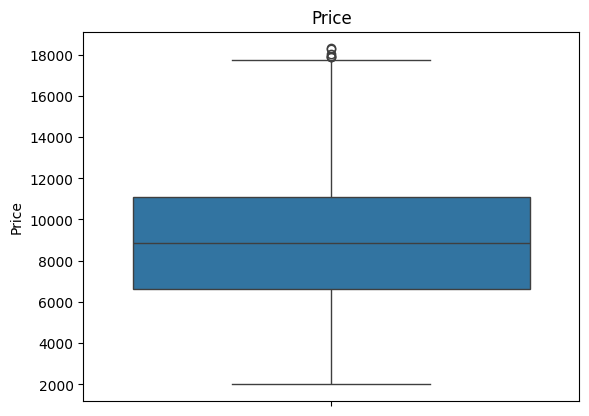

In [13]:
# Price
plt.title("Price")
sns.boxplot(numerical["Price"])
plt.show()

# FEATURE TRANSFORMATION

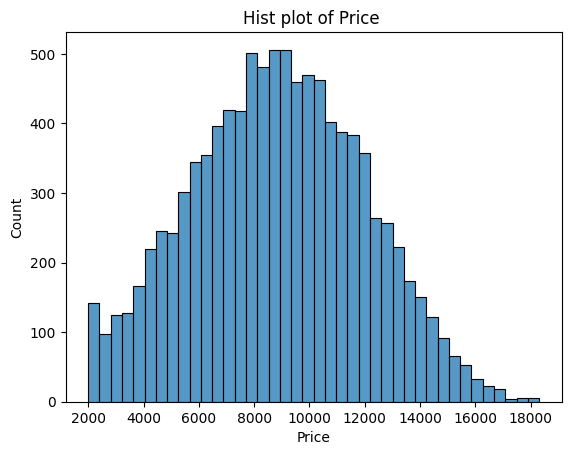

In [14]:
plt.title("Hist plot of Price ")
sns.histplot(numerical["Price"])
plt.show()

# removing outliers

In [15]:
from scipy.stats import zscore

In [16]:
numerical["zscore_value"] = zscore(numerical["Price"])
threshold = 3

numerical["outliers"] = numerical["zscore_value"].abs() > threshold
numerical = numerical[numerical["outliers"]==False]

numerical = numerical.drop(columns=["zscore_value", "outliers"])
print("The data after removing outliers...:",numerical)

print("-"*50)

print("After remving outliers the shape is :", numerical.shape)


The data after removing outliers...:       Year  Engine_Size  Mileage  Doors  Owner_Count  Price
0     2020          4.2   289944      3            5   8501
1     2012          2.0     5356      2            3  12092
2     2020          4.2   231440      4            2  11171
3     2023          2.0   160971      2            1  11780
4     2003          2.6   286618      3            3   2867
...    ...          ...      ...    ...          ...    ...
9995  2004          3.7     5794      2            4   8884
9996  2002          1.4   168000      2            1   6240
9997  2010          3.0    86664      5            1   9866
9998  2002          1.4   225772      4            1   4084
9999  2001          2.1   157882      3            3   3342

[9998 rows x 6 columns]
--------------------------------------------------
After remving outliers the shape is : (9998, 6)


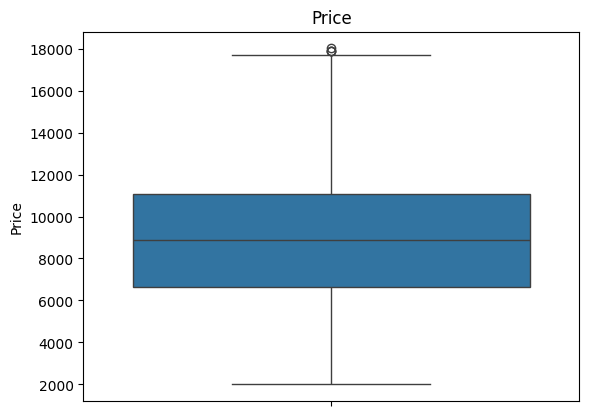

In [17]:
plt.title("Price")
sns.boxplot(numerical["Price"])
plt.show()

# SCALING TECHNIQUE

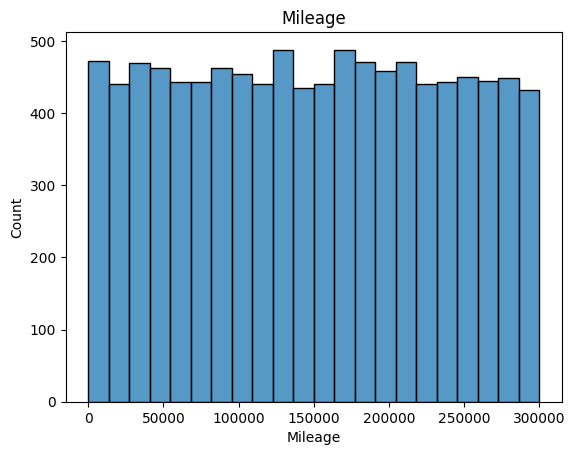

In [18]:
plt.title("Mileage")
sns.histplot(numerical["Mileage"])
plt.show()

# ENCODING TECHNIQUES

In [19]:
print("Unique values of Brand = ", categorical["Brand"].unique())
print("-"*50)

print("Unique values of Model = ", categorical["Model"].unique())
print("-"*50)

print("Unique values of Fuel_Type = ", categorical["Fuel_Type"].unique())
print("-"*50)

print("Unique values of Trasmission = ", categorical["Transmission"].unique())


Unique values of Brand =  ['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
--------------------------------------------------
Unique values of Model =  ['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord']
--------------------------------------------------
Unique values of Fuel_Type =  ['Diesel' 'Hybrid' 'Electric' 'Petrol']
--------------------------------------------------
Unique values of Trasmission =  ['Manual' 'Automatic' 'Semi-Automatic']


In [20]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [21]:
encoder_brand = LabelEncoder()
encoder_model = LabelEncoder()
encoder_fuel = LabelEncoder()
encoder_transmission = LabelEncoder()

categorical["Brand"] = encoder_brand.fit_transform(categorical["Brand"])
categorical["Model"] = encoder_model.fit_transform(categorical["Model"])
categorical["Fuel_Type"] = encoder_fuel.fit_transform(categorical["Fuel_Type"])
categorical["Transmission"] = encoder_transmission.fit_transform(categorical["Transmission"])

print("The encoded data:\n", categorical)

# Store all encoders in a dictionary
encoders = {
    "Brand": encoder_brand,
    "Model": encoder_model,
    "Fuel_Type": encoder_fuel,
    "Transmission": encoder_transmission
}

# Save encoders using pickle
with open("encoders.pkl", "wb") as file:
    pickle.dump(encoders, file)

print("✅ Encoders saved successfully!")



The encoded data:
       Brand  Model  Fuel_Type  Transmission
0         6     24          0             1
1         2     19          2             0
2         7     16          0             0
3         0     22          1             1
4         9     17          2             2
...     ...    ...        ...           ...
9995      6     20          0             2
9996      2     18          1             0
9997      1      0          3             0
9998      3     13          2             0
9999      9     27          0             1

[10000 rows x 4 columns]
✅ Encoders saved successfully!


# FINAL DATAFRAME

In [22]:
missing_indices = set(categorical.index) - set(numerical.index)
print("Missing Rows in Numerical:", missing_indices)

missing_indices = set(numerical.index) - set(categorical.index)
print("Missing Rows in Categorical:", missing_indices)


Missing Rows in Numerical: {1100, 7221}
Missing Rows in Categorical: set()


In [23]:
categorical = categorical.loc[numerical.index]

In [24]:
final_data = pd.concat([numerical, categorical], axis=1)

In [25]:
final_data

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,8501,6,24,0,1
1,2012,2.0,5356,2,3,12092,2,19,2,0
2,2020,4.2,231440,4,2,11171,7,16,0,0
3,2023,2.0,160971,2,1,11780,0,22,1,1
4,2003,2.6,286618,3,3,2867,9,17,2,2
...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,6,20,0,2
9996,2002,1.4,168000,2,1,6240,2,18,1,0
9997,2010,3.0,86664,5,1,9866,1,0,3,0
9998,2002,1.4,225772,4,1,4084,3,13,2,0


# FEATURE SELECTION 

In [26]:
corr_matrix =  final_data.corr()
print("The correlation matrix is = ",corr_matrix)

The correlation matrix is =                    Year  Engine_Size   Mileage     Doors  Owner_Count  \
Year          1.000000    -0.001799 -0.002000  0.014462    -0.000119   
Engine_Size  -0.001799     1.000000  0.015649 -0.010284     0.006878   
Mileage      -0.002000     0.015649  1.000000  0.008308     0.006515   
Doors         0.014462    -0.010284  0.008308  1.000000    -0.005624   
Owner_Count  -0.000119     0.006878  0.006515 -0.005624     1.000000   
Price         0.662880     0.356849 -0.550917 -0.000309     0.002230   
Brand        -0.000772     0.001361 -0.010239 -0.000577     0.020220   
Model        -0.011532     0.003786 -0.007872  0.014483     0.025199   
Fuel_Type    -0.009101    -0.001912 -0.008629  0.011700    -0.000802   
Transmission -0.009350    -0.009559  0.020412  0.002544    -0.000780   

                 Price     Brand     Model  Fuel_Type  Transmission  
Year          0.662880 -0.000772 -0.011532  -0.009101     -0.009350  
Engine_Size   0.356849  0.001361  0.00

In [27]:
selected_feature = corr_matrix["Price"].abs() > 0.5
print(selected_feature)

Year             True
Engine_Size     False
Mileage          True
Doors           False
Owner_Count     False
Price            True
Brand           False
Model           False
Fuel_Type       False
Transmission    False
Name: Price, dtype: bool


In [28]:
new_df = final_data.loc[:, selected_feature] 

In [29]:
print("Data after feature selection = ")
new_df

Data after feature selection = 


,Year,Mileage,Price
0,2020,289944,8501
1,2012,5356,12092
2,2020,231440,11171
3,2023,160971,11780
4,2003,286618,2867
...,...,...,...
9995,2004,5794,8884
9996,2002,168000,6240
9997,2010,86664,9866
9998,2002,225772,4084


In [30]:
print("Minimum year:",new_df["Year"].min())
print("Maximum year:",new_df["Year"].max())

print("Minimum Mileage:",new_df["Mileage"].min())
print("Maximum year:",new_df["Mileage"].max())

Minimum year: 2000
Maximum year: 2023
Minimum Mileage: 25
Maximum year: 299947


# ML

In [31]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [32]:
x = new_df.drop(columns=["Price"])
y = new_df["Price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

# Loop through models and evaluate performance
for name, model in models.items():
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print("=" * 50)

Model: Linear Regression
Mean Squared Error: 2359674.094593126
R2 Score: 0.7421109295778197
Model: Lasso
Mean Squared Error: 2359659.8380120234
R2 Score: 0.7421124876813121
Model: Ridge
Mean Squared Error: 2359673.5593131226
R2 Score: 0.7421109880786367
Model: ElasticNet
Mean Squared Error: 2358007.1634223
R2 Score: 0.7422931086893703


In [33]:
x = new_df.drop(columns=["Price"])
y = new_df["Price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


linear = LinearRegression()
linear.fit(x_train,y_train)

with open("linear.pkl","wb") as file:
    pickle.dump(linear,file)
print("Model saved successfully.....")
print("="*50)

prediction = linear.predict(x_test)

mse = mean_squared_error(y_test,prediction)
print("The MSE = ", mse)
print("="*50)

r2 = r2_score(y_test,prediction)
print("The r2 score = ", r2)

Model saved successfully.....
The MSE =  2359674.094593126
The r2 score =  0.7421109295778197
